# Introduction to Data Science, CS 5963 / Math 3900
## Lecture 6: Linear Regression II

This lecture is a continuation of Lecture 5 on Linear Regression. 

Recommended Reading: ISLR, Ch.3
Available digitally here: [link](http://www-bcf.usc.edu/~gareth/ISL/)

## Linear Regression 


**Goal** Given samples $(x_1,y_1), (x_2,y_2),\ldots,(x_n,y_n)$, find the values of $\beta_0$ and $\beta_1$, denoted $\hat \beta_0$ and $\hat \beta_1$, so that the prediction $$y = \hat \beta_0 + \hat \beta_1 x$$
``best fits’’ the data.


We proved the following theorem in class during lecture 5.

**Theorem** The parameters that minimize the ``residual sum of squares (RSS)’’ $RSS = \sum_i (y_i - \beta_0 - \beta_1 x_i)^2$ are: 
$$
\hat \beta_1 = \frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^n (x_i - \bar x)^2}
\quad \text{and} \quad
\hat \beta_0 = \bar y - \hat \beta_1 \bar x. 
$$

## Advertising dataset
Last time, we introduced the 'Advertising' dataset, available
[here](http://www-bcf.usc.edu/~gareth/ISL/data.html). 

For 200 different ‘markets’ (think different cities), this dataset consists of the number of sales of a particular product as well as the advertising budget for different media: TV, radio, and newspaper. 

We began using tools from linear regression to study the effect of advertising on sales with the hope that this might help inform or evaluate an advertising strategy for this product. 


In [1]:
import pandas as pd

import scipy as sc
from scipy.stats import linregress
from scipy.stats import norm

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
advert = pd.read_csv('Advertising.csv',index_col=0) #load data
print(advert)

Sales = advert['Sales'].tolist()
TV_budget=advert['TV'].tolist()
Radio_budget=advert['Radio'].tolist()
Newspaper_budget=advert['Newspaper'].tolist()

        TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
6      8.7   48.9       75.0    7.2
7     57.5   32.8       23.5   11.8
8    120.2   19.6       11.6   13.2
9      8.6    2.1        1.0    4.8
10   199.8    2.6       21.2   10.6
11    66.1    5.8       24.2    8.6
12   214.7   24.0        4.0   17.4
13    23.8   35.1       65.9    9.2
14    97.5    7.6        7.2    9.7
15   204.1   32.9       46.0   19.0
16   195.4   47.7       52.9   22.4
17    67.8   36.6      114.0   12.5
18   281.4   39.6       55.8   24.4
19    69.2   20.5       18.3   11.3
20   147.3   23.9       19.1   14.6
21   218.4   27.7       53.4   18.0
22   237.4    5.1       23.5   12.5
23    13.2   15.9       49.6    5.6
24   228.3   16.9       26.2   15.5
25    62.3   12.6       18.3    9.7
26   262.9    3.5       19.5   12.0
27   142.9   29.3       12.6

## Linear Regression for the Advertising dataset

Here the number of sales is the *dependent variable* (*response*) and the advertising budget for different media: TV, radio, and newspaper are the *independent variables* (*predictors*). 

We consider models of the form

\begin{align*}
\text{Sales} &= \beta_0 + \beta_1 * \text{TV_budget} \\ 
\text{Sales} &= \beta_0 + \beta_1 * \text{Radio_budget} \\
\text{Sales} &= \beta_0 + \beta_1 * \text{Newspaper_budget}
\end{align*}

The model is:   y   = beta_0 + beta_1 * x
              Sales = 7.0326 + 0.0475 * TV_budget.
r-squared value = 0.6119 (measure of fit)
p-value = 0.0 (H_0: slope is zero.)
standard error = 0.0027


The model is:   y   = beta_0 + beta_1 * x
              Sales = 9.3116 + 0.2025 * Radio_budget.
r-squared value = 0.332 (measure of fit)
p-value = 0.0 (H_0: slope is zero.)
standard error = 0.0204


The model is:   y   = beta_0 + beta_1 * x
              Sales = 12.3514 + 0.0547 * Newspaper_budget.
r-squared value = 0.0521 (measure of fit)
p-value = 0.0011 (H_0: slope is zero.)
standard error = 0.0166


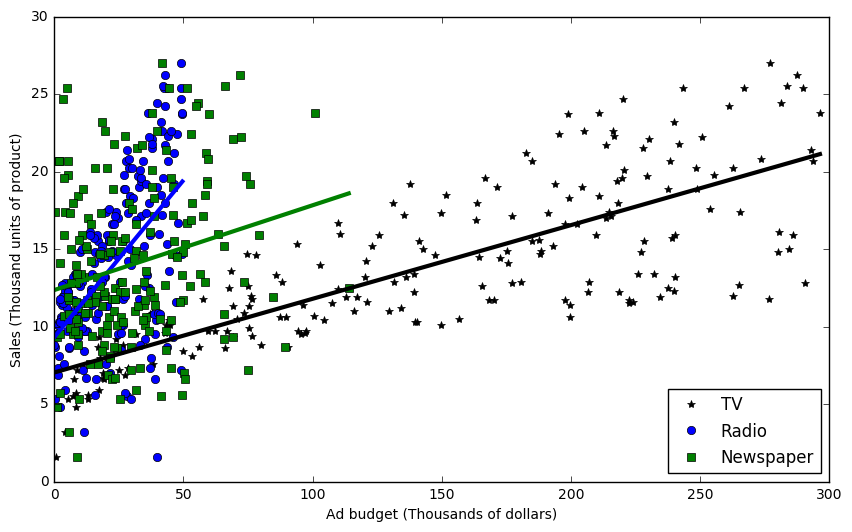

In [3]:
lr_tv_sales = linregress(x=TV_budget, y=Sales)

print('The model is:   y   = beta_0 + beta_1 * x') 
print('              Sales = ' + str(round(lr_tv_sales.intercept,4)) + ' + ' + str(round(lr_tv_sales.slope,4)) + ' * TV_budget.')
print("r-squared value = " + str(round(lr_tv_sales.rvalue**2,4)) + " (measure of fit)")
print("p-value = " + str(round(lr_tv_sales.pvalue,4)) + " (H_0: slope is zero.)")
print("standard error = " + str(round(lr_tv_sales.stderr,4)))
print("\n")

lr_radio_sales = linregress(x=Radio_budget, y=Sales)

print('The model is:   y   = beta_0 + beta_1 * x') 
print('              Sales = ' + str(round(lr_radio_sales.intercept,4)) + ' + ' + str(round(lr_radio_sales.slope,4)) + ' * Radio_budget.')
print("r-squared value = " + str(round(lr_radio_sales.rvalue**2,4)) + " (measure of fit)")
print("p-value = " + str(round(lr_radio_sales.pvalue,4)) + " (H_0: slope is zero.)")
print("standard error = " + str(round(lr_radio_sales.stderr,4)))
print("\n")

lr_news_sales = linregress(x=Newspaper_budget, y=Sales)

print('The model is:   y   = beta_0 + beta_1 * x') 
print('              Sales = ' + str(round(lr_news_sales.intercept,4)) + ' + ' + str(round(lr_news_sales.slope,4)) + ' * Newspaper_budget.')
print("r-squared value = " + str(round(lr_news_sales.rvalue**2,4)) + " (measure of fit)")
print("p-value = " + str(round(lr_news_sales.pvalue,4)) + " (H_0: slope is zero.)")
print("standard error = " + str(round(lr_news_sales.stderr,4)))

plt.plot(TV_budget,Sales,'k*',label='TV')
plt.plot(Radio_budget,Sales,'bo',label='Radio')
plt.plot(Newspaper_budget,Sales,'gs',label='Newspaper')
plt.legend(numpoints=1,loc=4)

x = sc.linspace(0,max(TV_budget),1000)
plt.plot(x,lr_tv_sales.intercept + lr_tv_sales.slope*x,'k',linewidth=3)

x = sc.linspace(0,max(Radio_budget),1000)
plt.plot(x,lr_radio_sales.intercept + lr_radio_sales.slope*x,'b',linewidth=3)

x = sc.linspace(0,max(Newspaper_budget),1000)
plt.plot(x,lr_news_sales.intercept + lr_news_sales.slope*x,'g',linewidth=3)

plt.xlim(0,300)
plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

## Interpretation and discussion

The slope $(y/x)$ of the linear fits predict: For every additional $x$ dollars spent on advertisting, an additional $y$ units of product are sold. 

The intercepts of the lines predict how much of the product will be sold without any advertising. (Return customers?) 

The standard error or **residual standard error (RSE)**? is the average ammount for which the response variable differs from the predicted values,
$$
RSE = \sqrt{\frac{1}{n-2} \sum_{i=1}^n (y_i - \hat\beta_0 - \hat\beta_1 x_i)^2}. 
$$
Remember that we chose $\hat\beta_0$ and $\hat\beta_1$ to minimize the squared RSE.  If the RSE is small, then the model fits the data very well. 

The **$R^2$ value** is the proportion (takes values between 0 and 1) of variability explained by the linear regression,
$$
R^2 = \frac{TSS - RSS}{TSS}.
$$ 
Here the residual sum of squares (RSS) and total sum of squares (TSS) are defined by
$$
RSS = \sum_{i=1}^n (y_i - \hat\beta_0 - \hat\beta_1 x_i)^2
\qquad \text{and} \qquad 
TSS = \sum_{i=1}^n (y_i - \bar y)^2. 
$$
A model is good if the $R^2$ value is nearly one (the model explains all of the variance in the data). 


![image](http://imgs.xkcd.com/comics/linear_regression.png)


Finally, what is the **p-value** associated with the linear regression? It comes from a hypothesis test that is used to evaluate whether there is a relationship between the two variables. 

## Hypothesis testing in linear regression

In lecture 2, we introduced a distrinction between exploratory data analysis and statistical inference. 
1. In exploratory data analysis, one seeks just to describe the data. In the present setting, we have described how the response variable linearly depends on the predictor variable by minimizing the residual sum of squares (RSS). 
+ The statistical inference way of looking at this problem would be to suppose that there exists a ground truth population with $x$ and $y$ related by 
$$
y = \beta_0 + \beta_1 x 
$$
for some unknown values of $\beta_0$ and $\beta_1$. 
Our sampled data consists of points $(x_i, y_i)$ of the form 
$$
y_i = \beta_0 + \beta_1 x_i + \epsilon. 
$$
Here $\epsilon$ is an random variable (say normally distributed) that we think of as "error" being introduced into the samples. The job of the statistician is to *infer* the values of $\beta_0$ and $\beta_1$ from the erroneous data.  

This is precisely the setting we were in when determining wheter a coin was fair. There, we had a sample proportion of heads (analogous to the samples $(x_i,y_i)$ here.) We used the Central Limit Theorem to say that standard variance (standard error) is given by
$$
SE(\hat \mu)^2 = \sigma^2/n 
$$
Using this value and assuming the null hypothesis (the coin is fair), we could evaluate the likelihood of obtaining a sample as extreme as the one obtained. 

For linear regression, we will take the null hypothesis to be
$$
H_0: \text{There is no relationship between $x$ and $y$} \iff \beta_1 = 0 
$$
with alternative
$$
H_a: \text{There is a relationship between $x$ and $y$}  \iff \beta_1 \neq 0 
$$
We assume that $\epsilon$ is a normal random variable with zero mean and variance $\sigma^2$. Using similar ideas as above, the standard error for $\hat \beta_0$ and $\hat \beta_1$ (estimates of true parameters in this model) are computed to be 
$$
SE(\hat \beta_0)^2 = \sigma^2 \left( \frac{1}{n} + \frac{\bar x^2}{\sum_{i=1}^n (x_i - \bar x)^2} \right) 
\quad \text{and} \quad
SE(\hat \beta_1)^2 =  \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar x)^2}
$$


For this hypothesis test, the test statistic is 
$$
t = \frac{ \hat \beta_1 - 0}{SE(\hat \beta_1)},
$$
which under the assumptions of the null hypothesis, is distributed according to the $t$ distribution with $n-2$ degrees of freedom. The $p$-value is computed as the probability of observing a value as extreme as $|t|$. A small $p$-value is interpreted to mean that there is an association between the independent and dependent variables. 

Before we go back and discuss the $p$-values for the advertising data, let's look at some synthetic data. We generate 100 random points according the model 
$$
y = 3x + \epsilon,
$$
where $\epsilon$ is normally distributed with mean zero and standard deviation 3. The best fit is found and this process is repeated 1000 times over. 

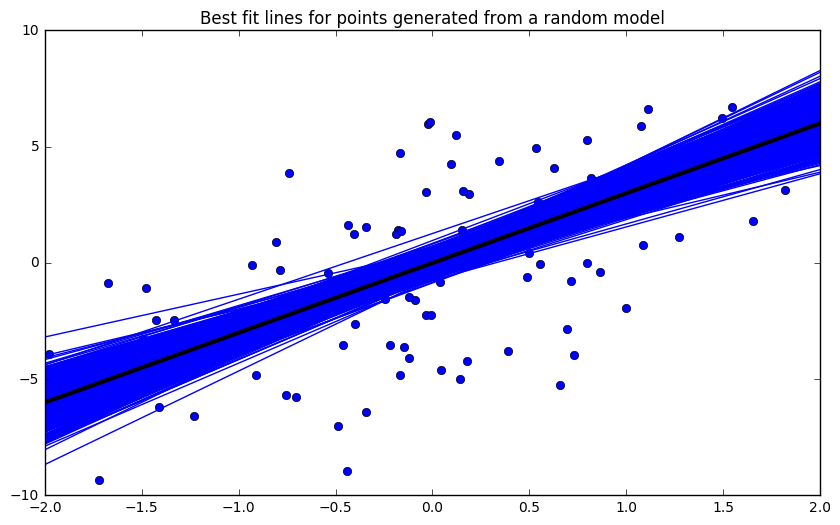

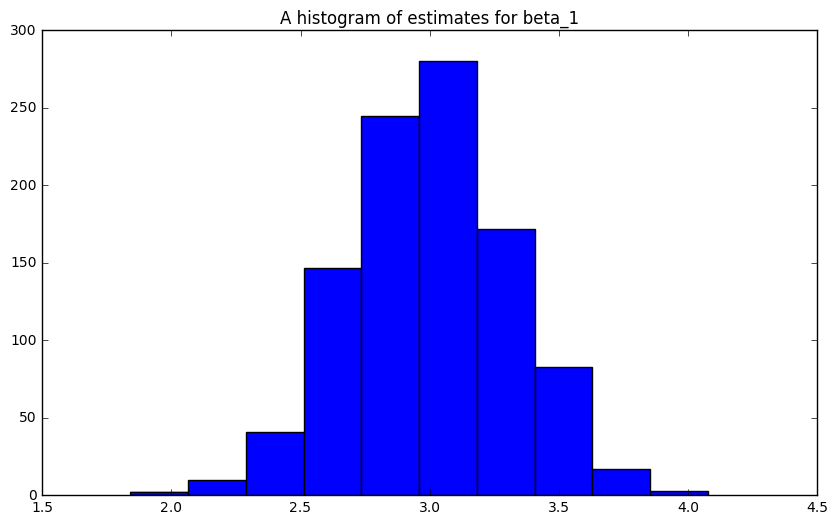

In [4]:
f= lambda x: 3*x
x = sc.linspace(-2,2,1000)
plt.figure(0)

sample_size = 100
betaOnes = []
for ii in range(1000):
    xp = norm.rvs(size=sample_size)
    yp = f(xp)+norm.rvs(size=sample_size,scale=3)
    if ii is 1: plt.plot(xp,yp,'bo')        
    lr = linregress(x=xp, y=yp)
    y = lr.intercept + lr.slope*x
    plt.plot(x,y,'b',linewidth=1)
    # Collect the t values instead. . . 
    betaOnes.append(lr.slope)

plt.plot(x,f(x),'k',linewidth=3)
plt.xlim(-2,2)    
plt.ylim(-10,10)    
plt.title('Best fit lines for points generated from a random model')
plt.show()

plt.figure(2)
plt.hist(betaOnes)
plt.title('A histogram of estimates for beta_1')
plt.show()


## Effective advertising media? 

The slope for radio is largest, so you might argue that this is the most effective advertising media. For every additional \$1k spent on Radio advertising, an additional 202 units of product are sold. (Compare to 54.7 for newspaper and 47.5 for TV.)

On the other hand, the $R^2$ value for radio is just $33\%$. So the model isn't explaining as much of the data as the model for TV advertising ($R^2 = 61\%$), but is explaining more than the model for newspaper advertising ($R^2 = 5\%). 

The main problem with the approach here is that for each advertising media we look at, we're ignoring the ads in the other media. For example in the model for TV advertising, 
$$
\text{Sales} = \beta_0 + \beta_1 * \text{TV_budget},
$$
we're ignoring both Radio and Newspaper advertising. 

We need to take all three into account at once. Maybe we can construct a model that looks like 
$$
\text{Sales} = \beta_0 + \beta_1 * \text{TV_budget} + \beta_2*\text{Radio_budget} + \beta_3*\text{Newspaper_budget}. 
$$
This is the idea behind Multiple Linear Regression.

# Multiple Linear Regression
Scipy does have a function for mulltiple linear regression. 

There are a few choices for us to use, including
1. [Statsmodels](http://statsmodels.sourceforge.net/)
+ [scikit-learn](http://scikit-learn.org/)

We'll use Statsmodels, since this has better integration with Pandas. First, we repeat the same linear regression as above, to see how the package works. 

In [5]:
# define model based on pandas dataset
model = sm.ols(formula="Sales ~ TV", data=advert)

# fit the model
model_result = model.fit()

print(model_result.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 19 Sep 2016   Prob (F-statistic):           1.47e-42
Time:                        15:47:41   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [6]:
model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=advert)
model_result = model.fit()
print(model_result.params)
print(model_result.summary())

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 19 Sep 2016   Prob (F-statistic):           1.58e-96
Time:                        15:47:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------

## Interpretation

Sepnding an additional \$1,000  on radio adertising results in an increasing in sales by 189 units. Radio is the most effective at method of advertising. 

Note that the coefficients for TV and Radio are approximately the same as for simple linear regression. The coefficient for Newspaper changed signficantly. Furthermore, note that the $p$-value is now very large $p=0.86$. There is no evidence to reject the null hypothesis that the Newspaper and Sales variables have no relationship. 

So then why did the simplie linear regression give that there is a relationship between Newspaper and Sales Variables? 
*Newspaper is actually a confounder!* (Remember the example where temperature is a confounder for pool deaths and ice creams sales.) Let's look at the correlations between the four variables. Recall that correlation between two variables is given by 
$$
r_{x,y} = \frac{ \frac{1}{n}\sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)}{s_x s_y}.
$$
Correlation is a number between −1 to +1 and measures how much the two variables vary together. 

Plotted below is also a scatter matrix plot which is a good way of visualizing the correlations. 

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd5d7b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e1b5a58>]], dtype=object)

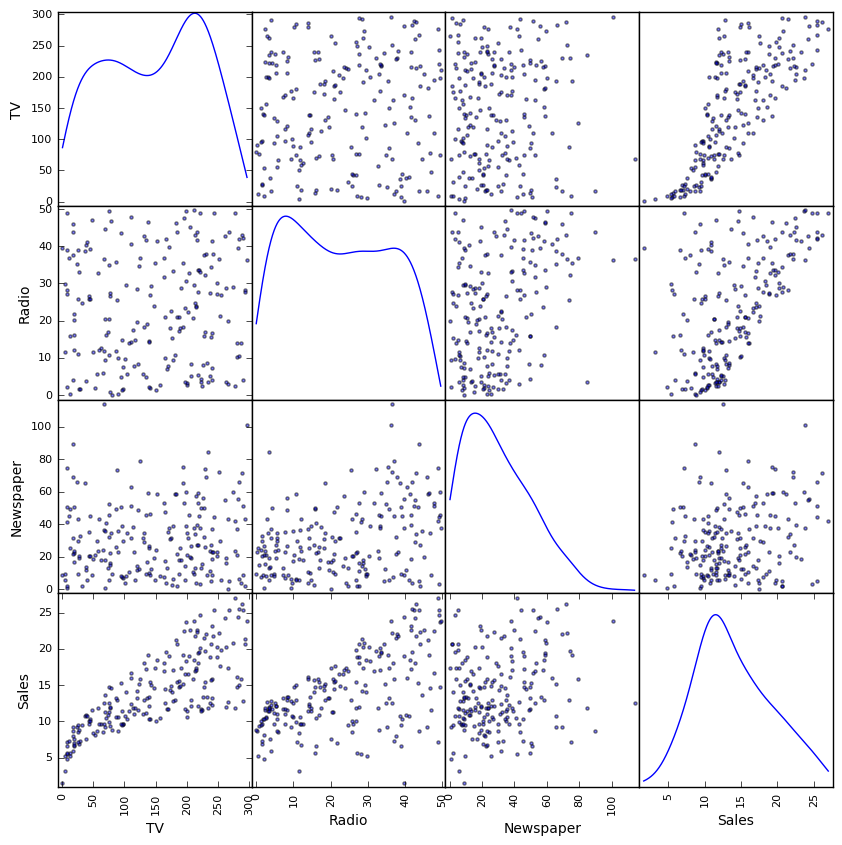

In [7]:
print(advert.corr())
pd.scatter_matrix(advert, figsize=(10, 10), diagonal='kde')

The correlation between Newspaper and Radio is 0.35, which implies that in markets where the company advertised using Radio, they also advertised using newspaper. Thus, the influence of Radio on Sales can be incorrectly attributed to Newspaper advertisements! 

This leads us to the following linear regression model, where we forget about Newspaper advertisements:
$$
\text{Sales} = \beta_0 + \beta_1 * \text{TV_budget} + \beta_2*\text{Radio_budget} 
$$


In [8]:
model = sm.ols(formula="Sales ~ TV + Radio", data=advert)
model_result = model.fit()
print(model_result.params)
print(model_result.summary())

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 19 Sep 2016   Prob (F-statistic):           4.83e-98
Time:                        15:47:43   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------

<IPython.core.display.Javascript object>


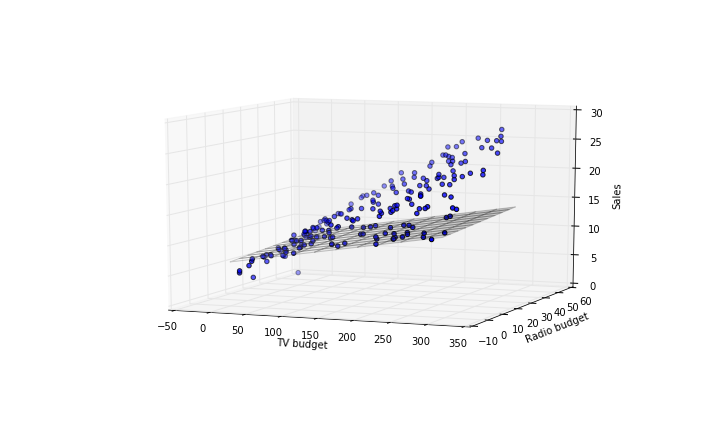

In [12]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = (10, 6)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=TV_budget, ys=Radio_budget, zs=Sales)

x = sc.linspace(min(TV_budget), max(TV_budget), 100)
y = sc.linspace(min(Radio_budget), max(Radio_budget), 100)
X, Y = sc.meshgrid(x,y)
Z = model_result.params.Intercept + model_result.params.TV*X + model_result.params.Radio*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2)

ax.view_init(25,-71)

ax.set_xlabel('TV budget')
ax.set_ylabel('Radio budget')
ax.set_zlabel('Sales')

plt.show()

This model performs pretty well. It accounts for $R^2 = 90\%$ of the variance in the data. We can do even better, if we consider a nonlinear model. 

## Nonlinear models

We can consider the interaction between TV and Radio advertising in the model, by taking 
$$
\text{Sales} = \beta_0 + \beta_1 * \text{TV_budget} + \beta_2*\text{Radio_budget} + \beta_3 \text{TV_budget} *\text{Radio_budget}. 
$$
The rational behind the last term is that perhaps spending $x$ on television advertising and $y$ on radio advertising leads to more sales than simply $x+y$. In marketing this is known as the *synergy effect*. In statistics it is known as the *interaction effect*.  

In [13]:
model = sm.ols(formula="Sales ~ TV + Radio + TV*Radio", data=advert)
model_result = model.fit()
print(model_result.params)
print(model_result.summary())

Intercept    6.750220
TV           0.019101
Radio        0.028860
TV:Radio     0.001086
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 19 Sep 2016   Prob (F-statistic):          6.68e-146
Time:                        15:50:06   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------

<IPython.core.display.Javascript object>


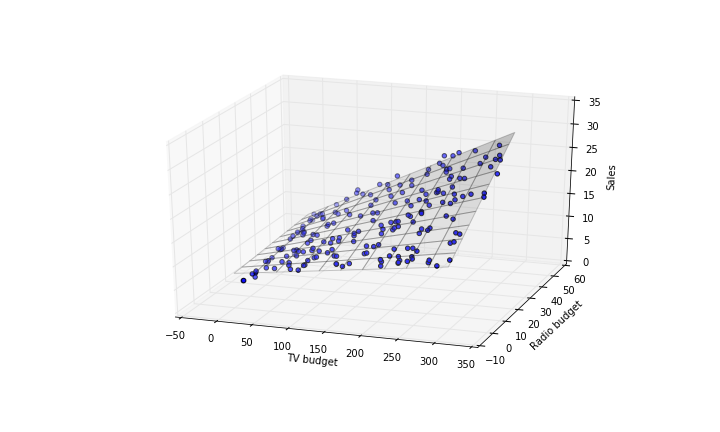

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=TV_budget, ys=Radio_budget, zs=Sales)

x = sc.linspace(min(TV_budget), max(TV_budget), 100)
y = sc.linspace(min(Radio_budget), max(Radio_budget), 100)
X, Y = sc.meshgrid(x,y)
par = dict(model_result.params)
Z = par["Intercept"] + par["TV"]*X + par["Radio"]*Y + par["TV:Radio"]*X*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2)

ax.view_init(25,-71)

ax.set_xlabel('TV budget')
ax.set_ylabel('Radio budget')
ax.set_zlabel('Sales')

plt.show()

This model is really excellent. All of the $p$-values are small and $R^2 = 97\%$ of the variability in the data is accounted for by the model. 

## A word of caution on overfitting (more on this later)

It is tempting to include a lot of terms in the regression, but this is problematic (think $p$-hacking.) A useful model will  *generalize* beyond the data given to it. 

We consider the Auto dataset, which contains 9 features (mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name) for 397 different used cars. Available digitally here: [link](http://www-bcf.usc.edu/~gareth/ISL/)

In [ ]:
auto = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv")
print(auto.head())
print(auto.describe())

# one of the horsepowers is '?', so we just remove it and then map the remaining strings to integers
auto = auto[auto.horsepower != '?']
auto['horsepower'] = auto['horsepower'].map(int)

We'll consider the relationship between mpg and horsepower

In [ ]:
plt.plot(auto['mpg'],auto['horsepower'],'b.',linewidth=1)
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.show()

We consider the linear model
$$
\text{mpg} = \beta_0 + \beta_1 \text{horsepower} + \beta_2 \text{horsepower}^2 + \cdots + \beta_m \text{horsepower}^m
$$
Here it might seem that choosing $m$ to be large would be a good thing. 

In [ ]:
# define model based on pandas dataset
mr1 = sm.ols(formula="mpg ~ horsepower", data=auto).fit()
par1 = dict(mr1.params)
mr2 = sm.ols(formula="mpg ~ horsepower + I(horsepower ** 2.0)", data=auto).fit()
par2 = dict(mr2.params)
mr3 = sm.ols(formula="mpg ~ horsepower + I(horsepower ** 2.0) + I(horsepower ** 3.0)", data=auto).fit()
par3 = dict(mr3.params)
mr4 = sm.ols(formula="mpg ~ horsepower + I(horsepower ** 2.0) + I(horsepower ** 3.0) + I(horsepower ** 4.0)", data=auto).fit()
par4 = dict(mr4.params)

plt.plot(auto['horsepower'],auto['mpg'],'b.')

x = sc.linspace(0,250,1000)
y1 = par1["Intercept"] + par1['horsepower']*x
y2 = par2["Intercept"] + par2['horsepower']*x + par2['I(horsepower ** 2.0)']*x**2
y3 = par3["Intercept"] + par3['horsepower']*x + par3['I(horsepower ** 2.0)']*x**2 + par3['I(horsepower ** 3.0)']*x**3
y4 = par4["Intercept"] + par4['horsepower']*x + par4['I(horsepower ** 2.0)']*x**2 + par4['I(horsepower ** 3.0)']*x**3 + par4['I(horsepower ** 4.0)']*x**4

plt.plot(x,y1,label="linear",linewidth=1)
plt.plot(x,y2,label="degree 2",linewidth=1)
plt.plot(x,y3,label="degree 3",linewidth=1)
plt.plot(x,y4,label="degree 4",linewidth=1)
plt.legend()
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.show()

In [ ]:
print(mr2.summary())
print('mr1',mr1.rsquared)
print('mr2',mr2.rsquared)
print('mr3',mr3.rsquared)
print('mr4',mr4.rsquared)

As $m$ increases, the $R^2$ value is becoming larger. (You can prove that this is always true if you add more predictors.)

On the other hand, for $m>2$, the $p$-values are very large, so we don't have a relationship between the variables. 

For now, we'll rely on Occam's razor to decide betwee models. Occam's razor is a problem-solving principle which in this case can be stated: among many different models that explain the data, the simplest one should be used. 
